In [1]:
import numpy as np
np.set_printoptions(threshold=np.inf)
import pandas as pd
import cv2
import os

Flowchart of Algorithm:

1. Loaded all images and selected bonefishes.png as template image
2. Computed PC1 of template image
3. For all remaining images, computed their PC1, found angle between PC1 of template image and PC1 of remaining images
4. Rotated all images clockwise or anticlockwise (using cross product)
5. Stored all output images  

In [2]:
input_images=[]
folder_path = './OneDrive_2023-09-27/KIMIA dataset'
file_list = os.listdir(folder_path)
image_files = [file for file in file_list]
for image_file in image_files:
    image_path = os.path.join(folder_path, image_file)
    if(image_file=='bonefishes.png'):
        template_image=cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        continue
    input_images.append(cv2.imread(image_path, cv2.IMREAD_GRAYSCALE))
    

In [3]:
from sklearn.decomposition import PCA

template_image=np.argwhere(template_image==0)
pca = PCA(n_components=1)
pca.fit(template_image)
template_eigenvectors=pca.components_[0]

output_images=[]
for inp_img in input_images:
    img=inp_img
    img=np.argwhere(img==0)
    pca = PCA(n_components=1)
    pca.fit(img)
    eig=pca.components_[0]
    
    cosine_similarity = np.dot(template_eigenvectors, eig) / (np.linalg.norm(template_eigenvectors)*np.linalg.norm(eig))
    angle_in_radians = np.arccos(np.clip(cosine_similarity, -1.0, 1.0))
    angle_in_degrees = np.degrees(angle_in_radians)
    cross_product = np.cross(eig,template_eigenvectors)
    if(cross_product<0):
        angle_in_degrees*=-1
        
    height, width = inp_img.shape[:2]
    rotation_matrix = cv2.getRotationMatrix2D((width / 2, height / 2), angle_in_degrees, 1)
    rotated_image = cv2.warpAffine(inp_img, rotation_matrix, (width, height))
    output_images.append(rotated_image)

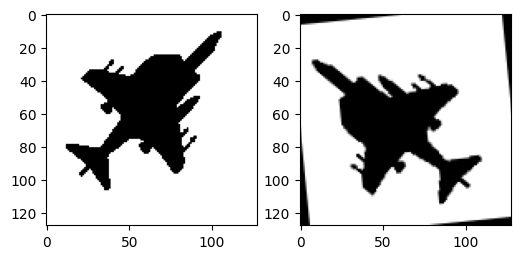

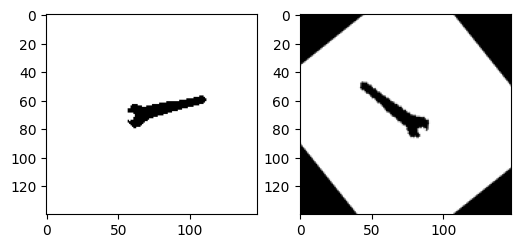

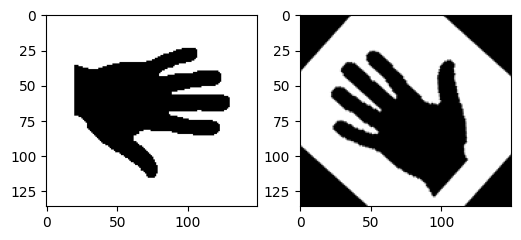

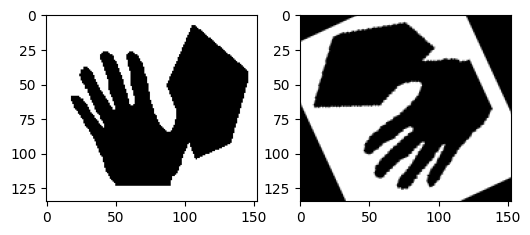

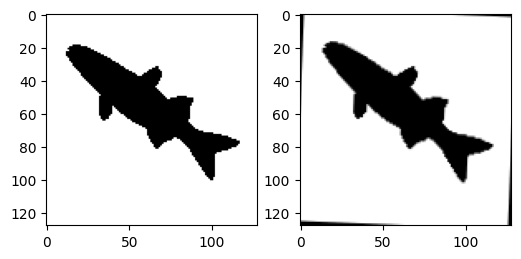

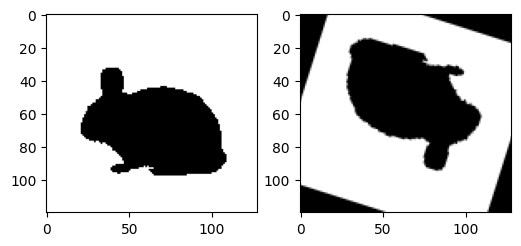

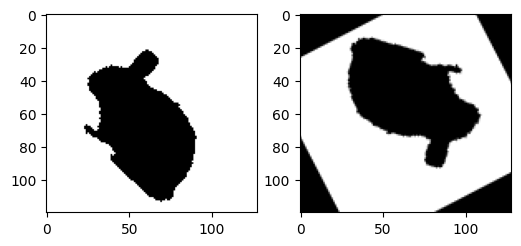

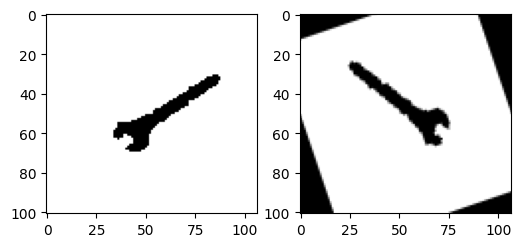

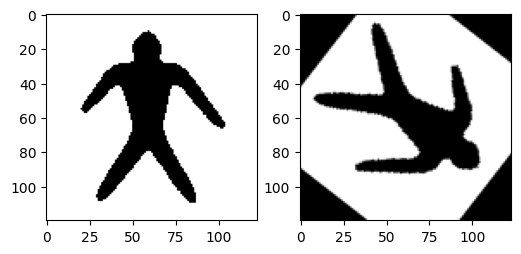

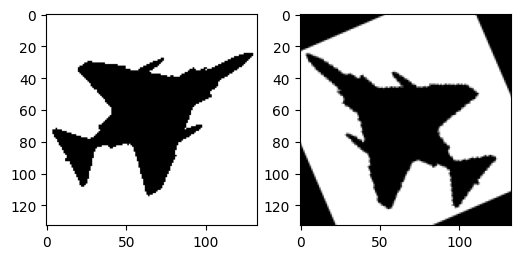

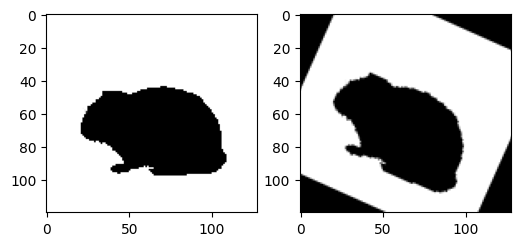

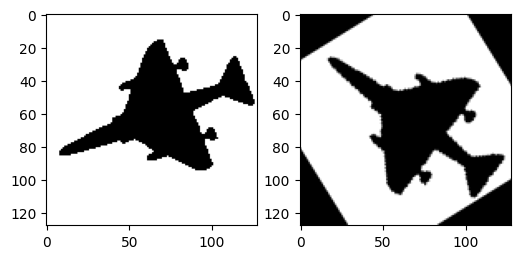

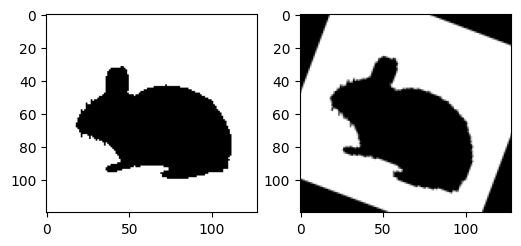

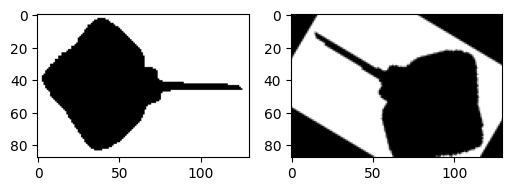

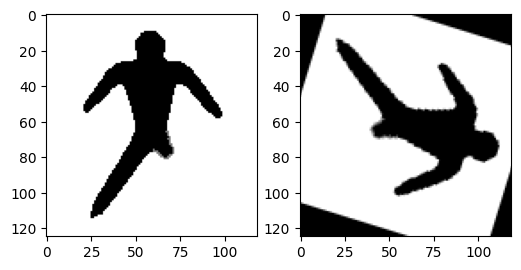

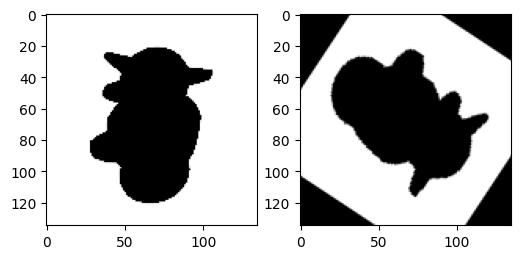

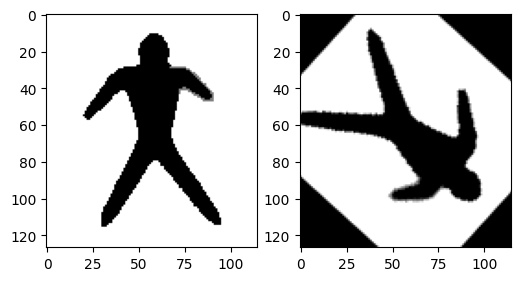

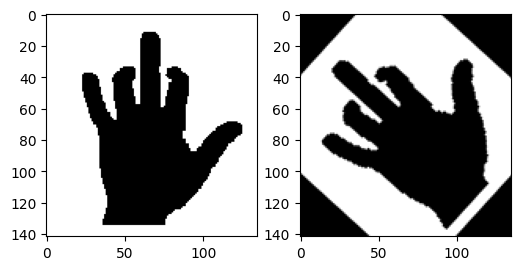

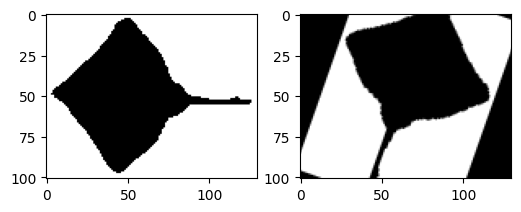

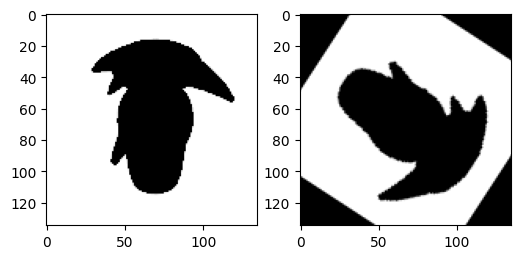

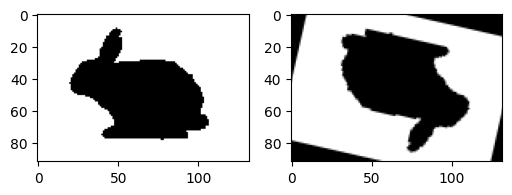

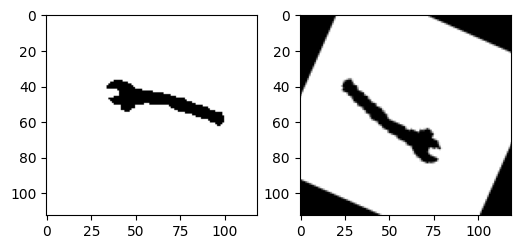

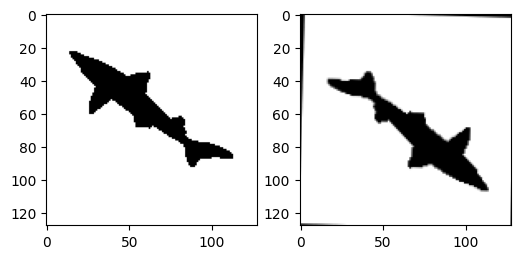

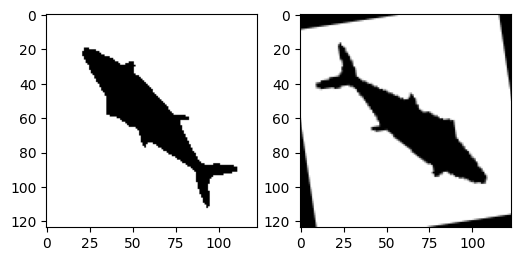

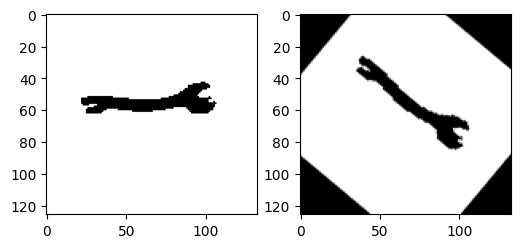

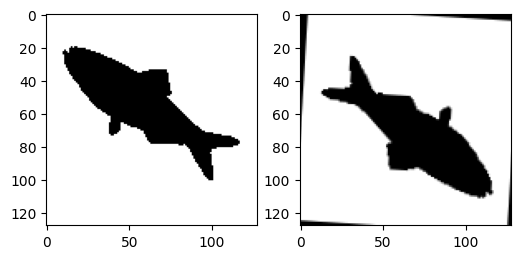

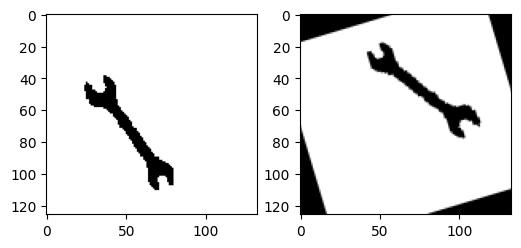

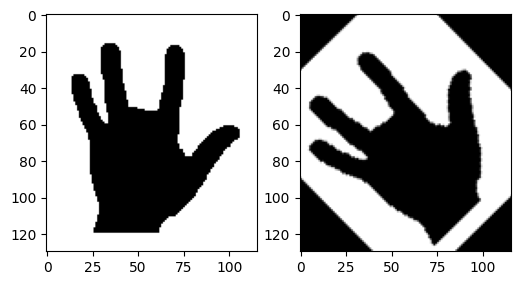

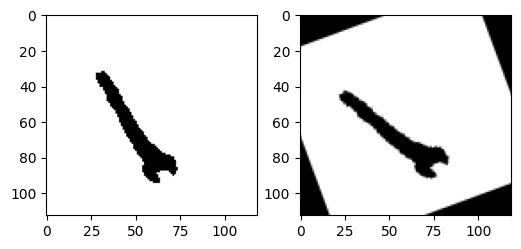

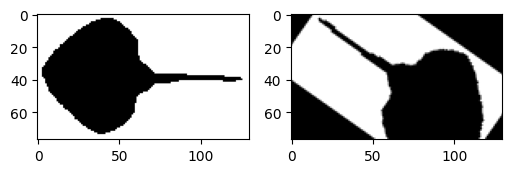

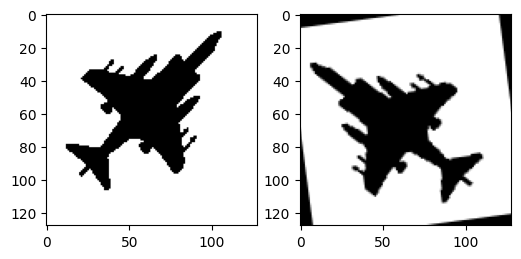

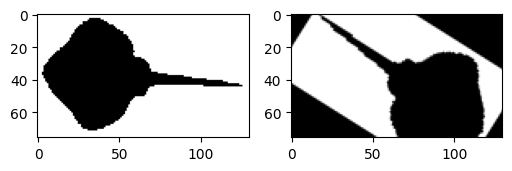

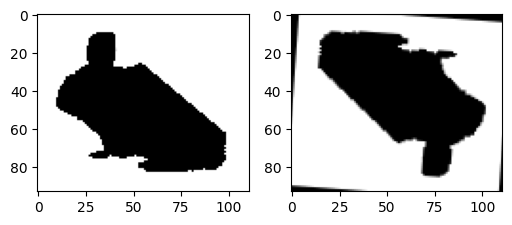

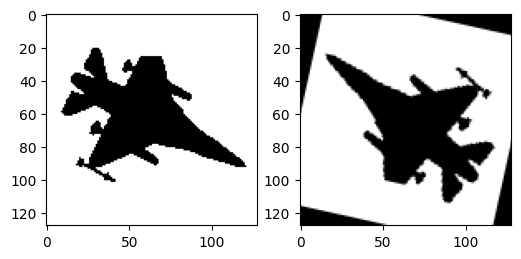

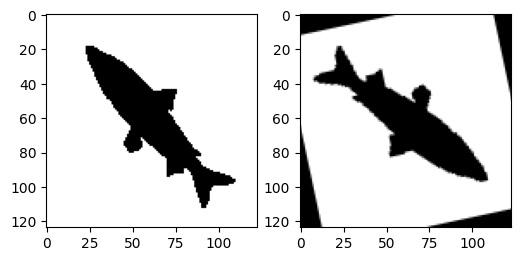

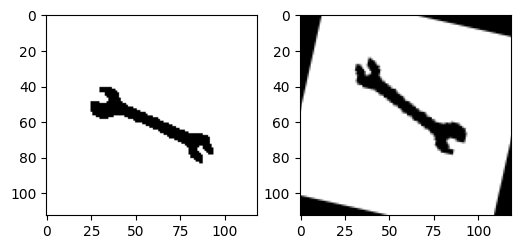

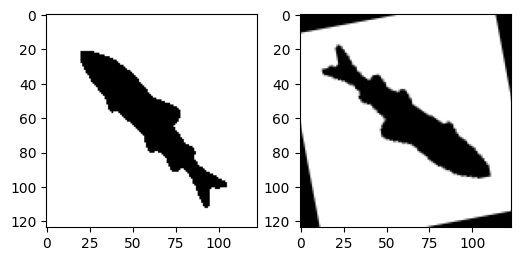

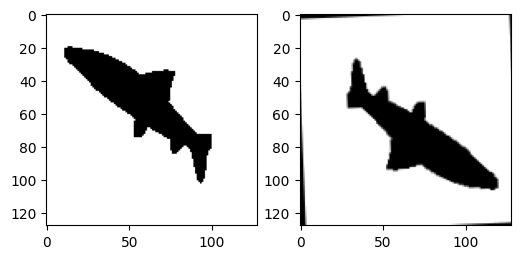

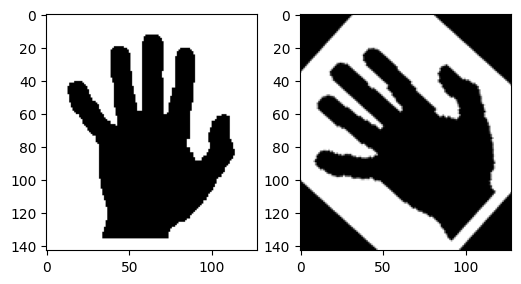

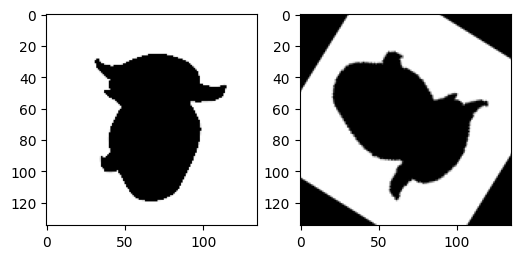

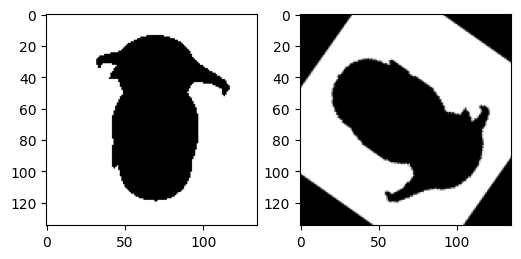

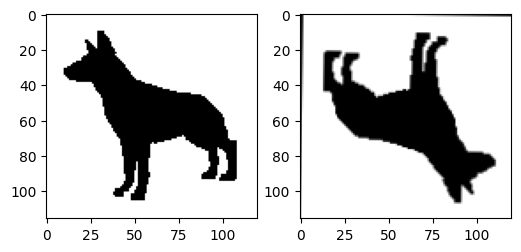

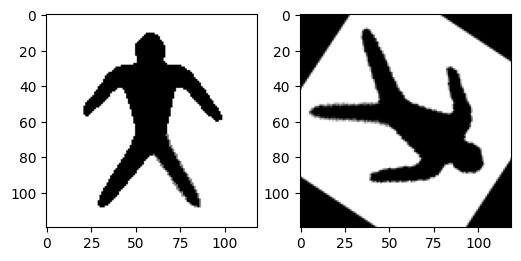

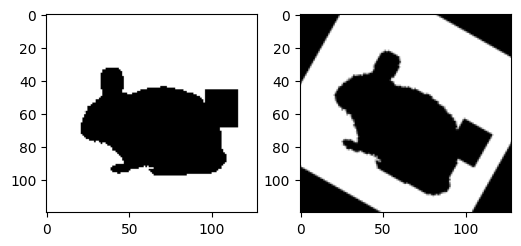

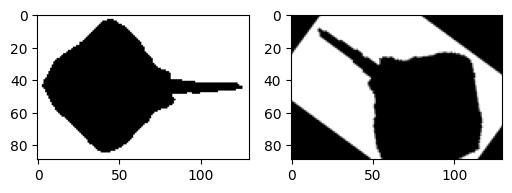

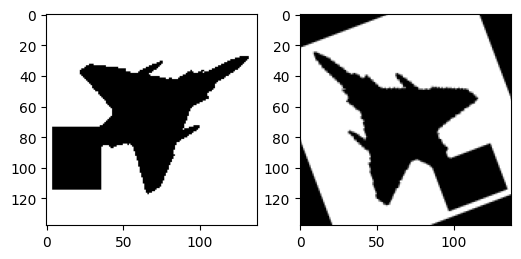

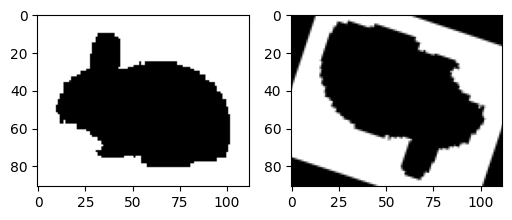

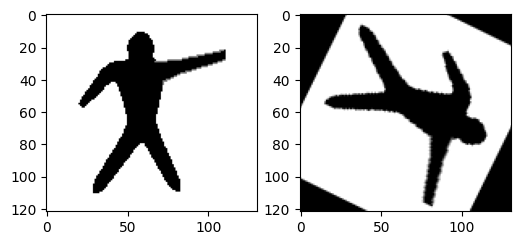

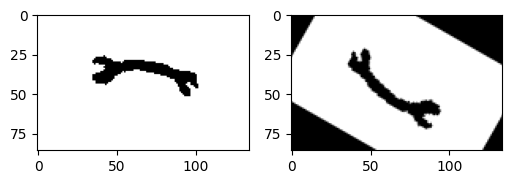

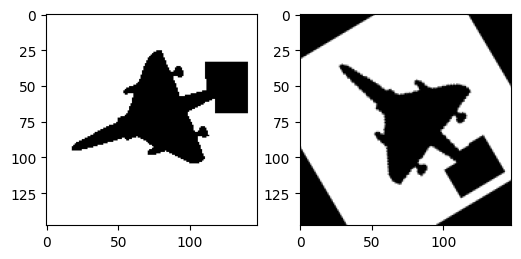

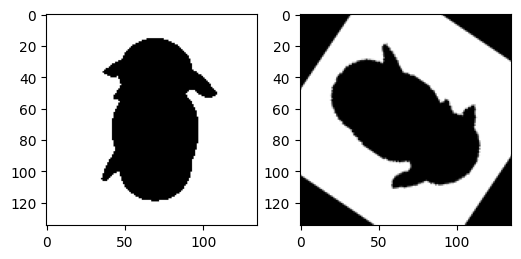

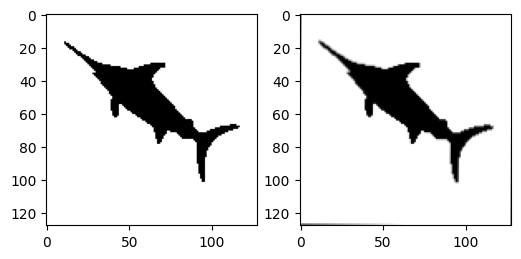

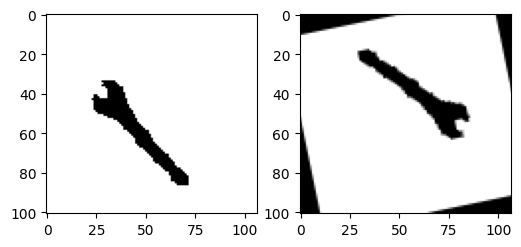

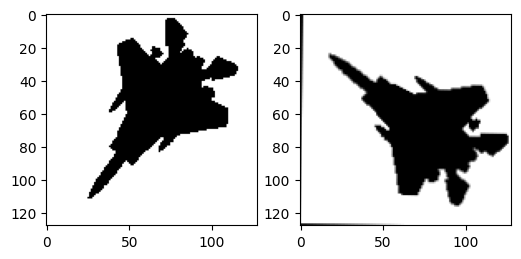

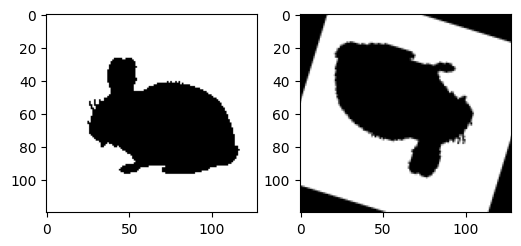

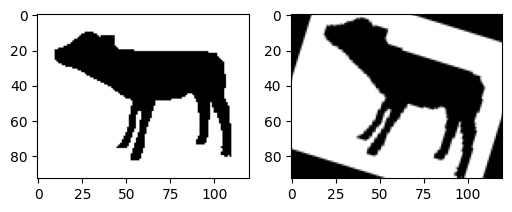

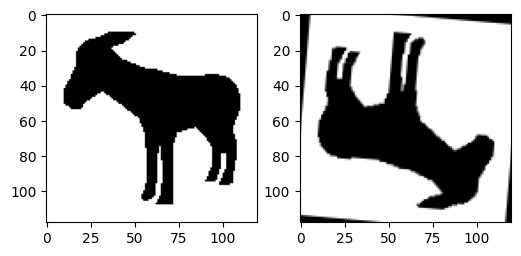

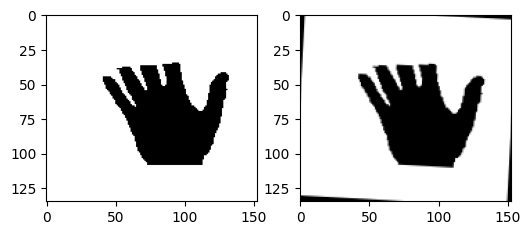

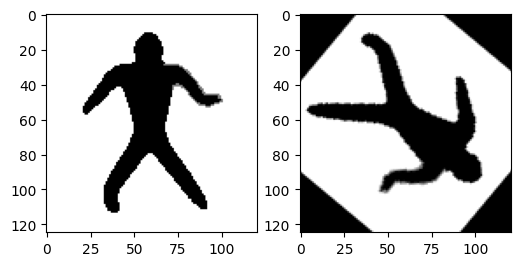

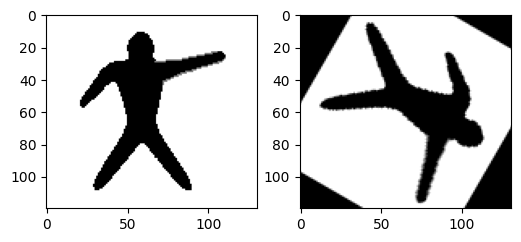

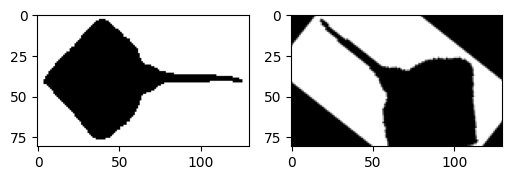

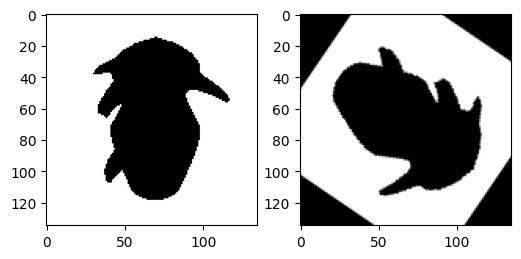

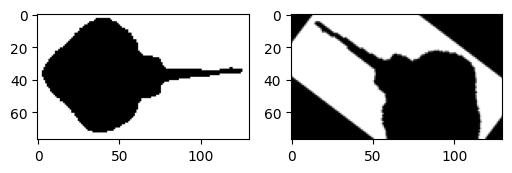

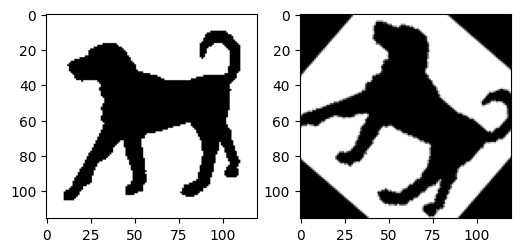

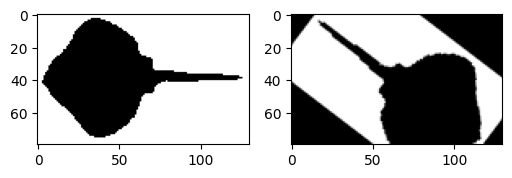

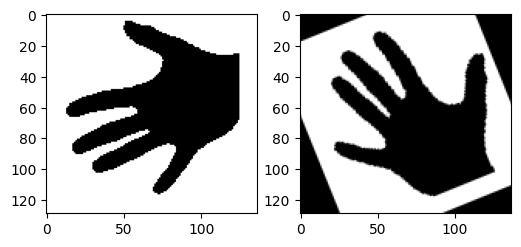

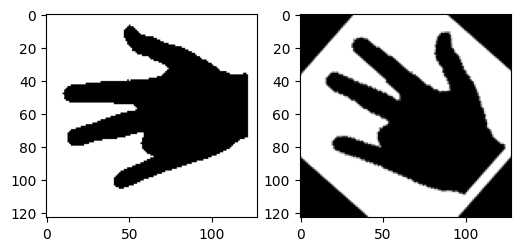

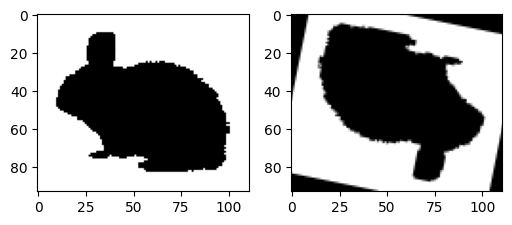

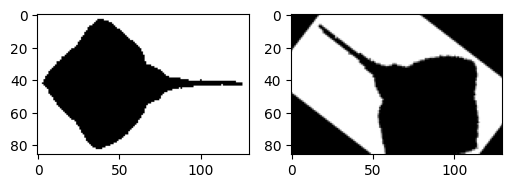

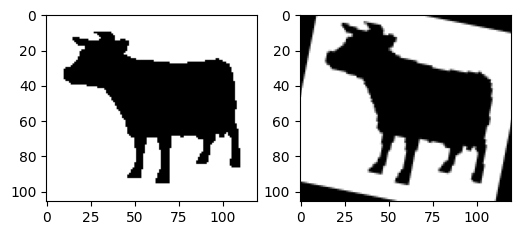

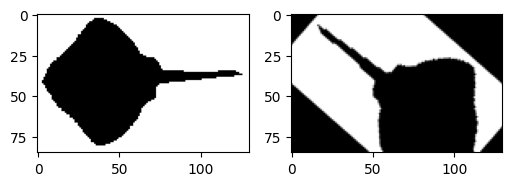

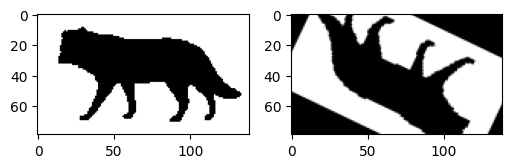

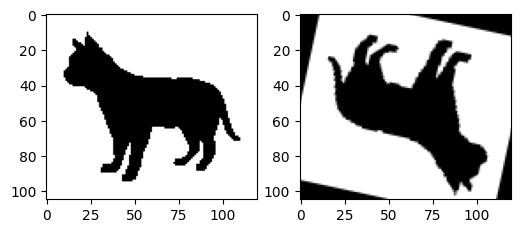

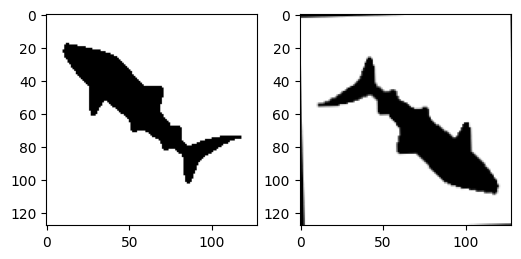

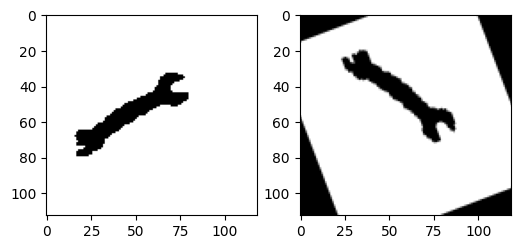

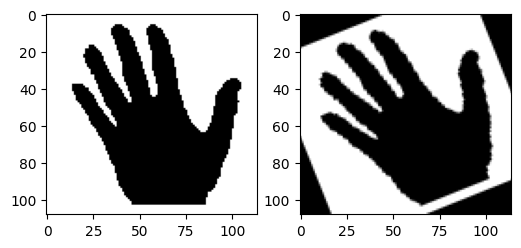

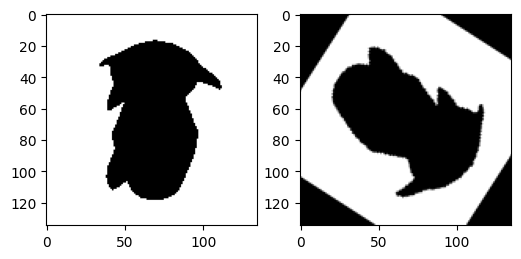

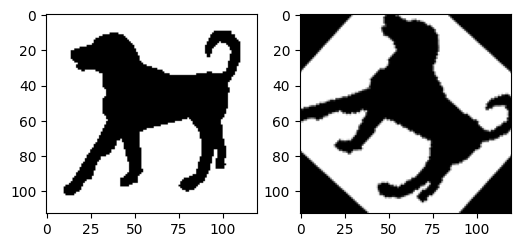

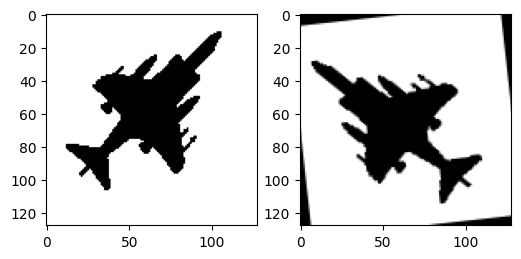

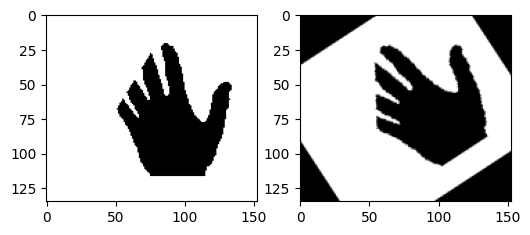

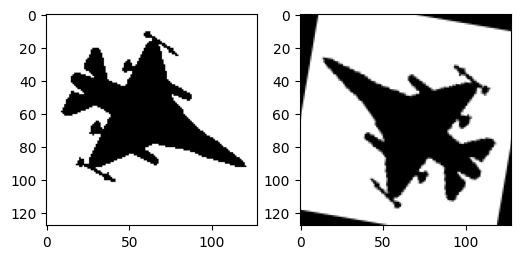

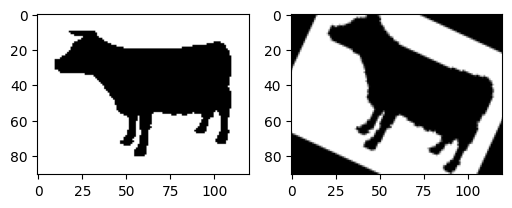

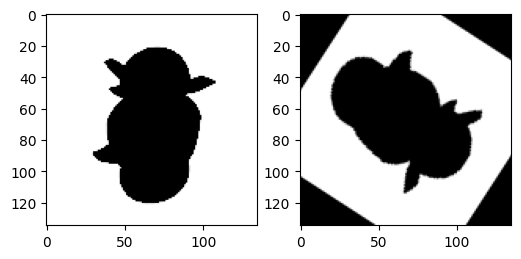

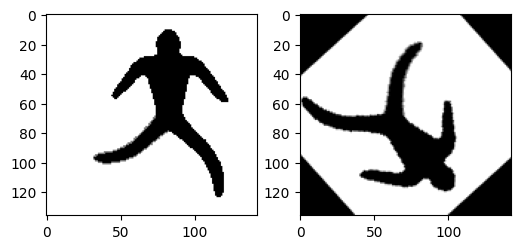

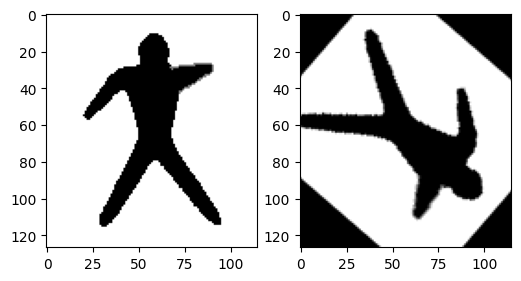

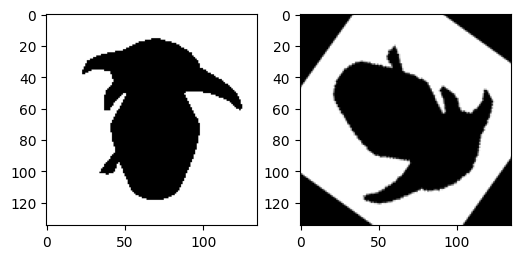

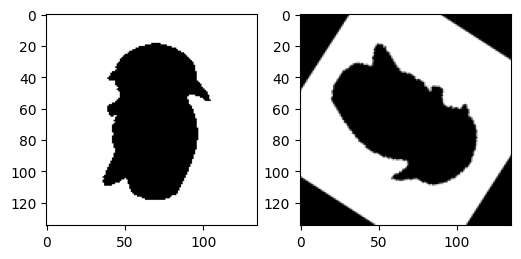

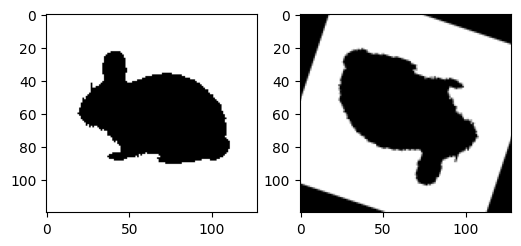

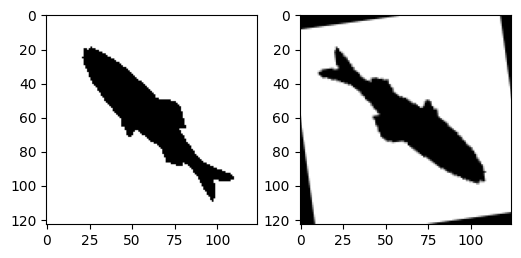

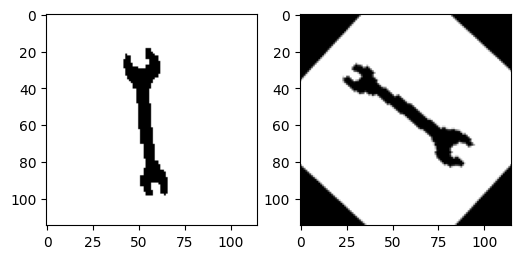

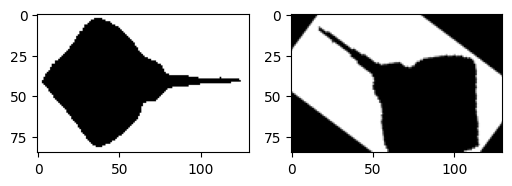

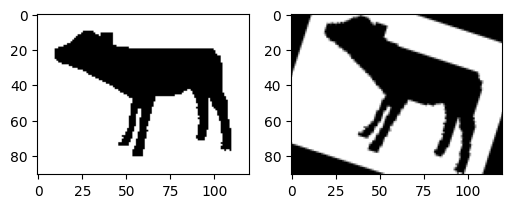

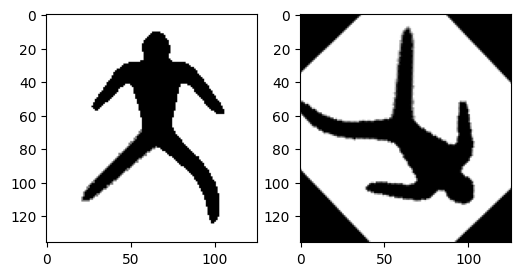

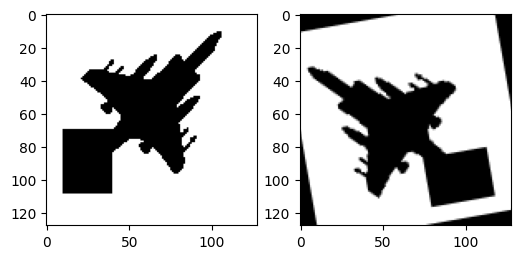

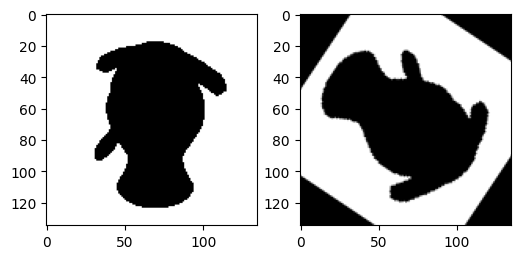

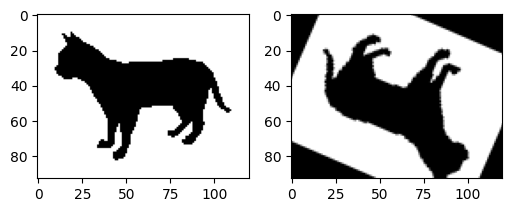

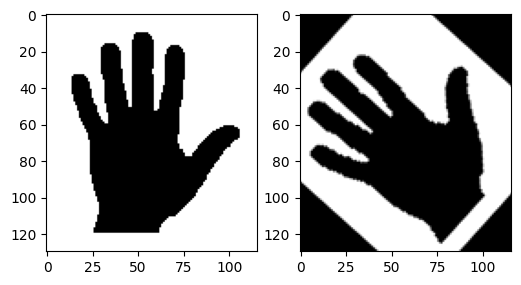

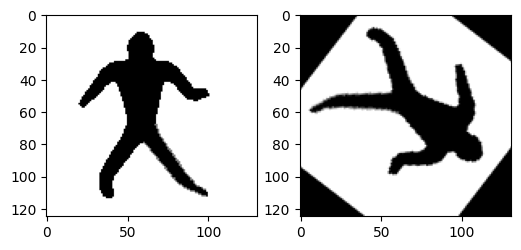

In [4]:
import matplotlib.pyplot as plt

for i in range(len(input_images)):
    fig, axes = plt.subplots(1, 2, figsize=(6, 6))  
    axes[0].imshow(input_images[i], cmap='gray')
    axes[1].imshow(output_images[i], cmap='gray')
    plt.show()